## Sigmoid Function

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    """Sigmoid return the probability given the input z"""
    # note how np.exp() works with both scalar and vectors/matrices
    return 1.0 / (1.0 + np.exp(-z))

In [2]:
z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

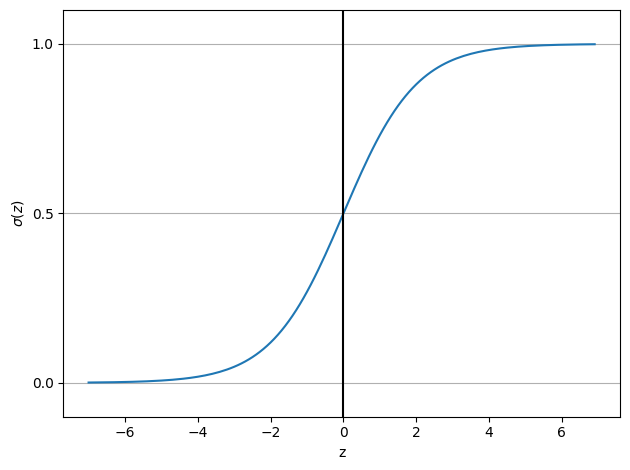

In [3]:
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()


In [4]:
# Plot the loss function of logistic regression
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
sigma_z = sigmoid(z)

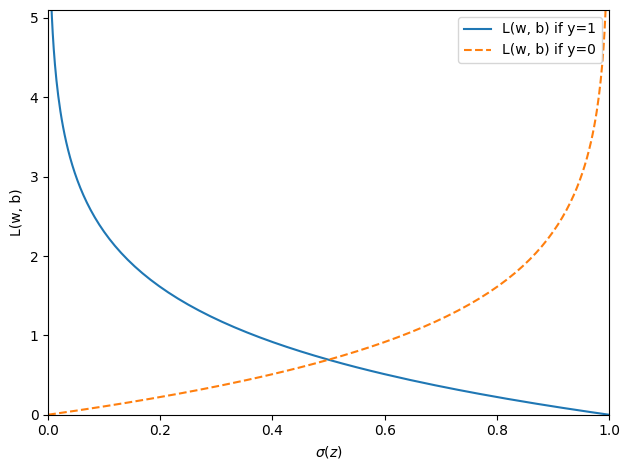

In [5]:
c1 = [loss_1(x) for x in z]
plt.plot(sigma_z, c1, label='L(w, b) if y=1')
c0 = [loss_0(x) for x in z]
plt.plot(sigma_z, c0, linestyle='--', label='L(w, b) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\sigma(z)$')
plt.ylabel('L(w, b)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Implementation (based on adaline impl)

In [6]:
import numpy as np

class LogisticRegressionGD:
    """Graident descent-based logistic regression classifier

    Parameters
    ------------
    eta : float 
        Learning rate (etween 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset
    random_state : int
        Random number generator seed for random weight init
        
    Attributes
    ------------
    w_ : 1-d array
        Weights after fitting
    b_ : Scalar
        Bias unit after fitting
    losses_ : list
        Number of mis
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ------------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors
        y : array-like, shape = [n_examples]
            Target values

        Returns
        ------------
        self: object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)

            # First difference compared to Adaline: the activation is now the sigmoid rather than linear
            output = self.activation(net_input)

            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()

            # 2nd difference compared to Adaline, the loss is different. Note how the gradients are the same tho!
            loss = (-y.dot(np.log(output))
                    - ((1-y).dot(np.log(1 - output)))
                    / X.shape[0])
            
            self.losses_.append(loss)

        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, z):
        """Compute the sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [7]:
# Load the data like before
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
# Note that LR support only binary classification by default
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)

In [9]:
lrgd.fit(X_train_01_subset, y_train_01_subset)

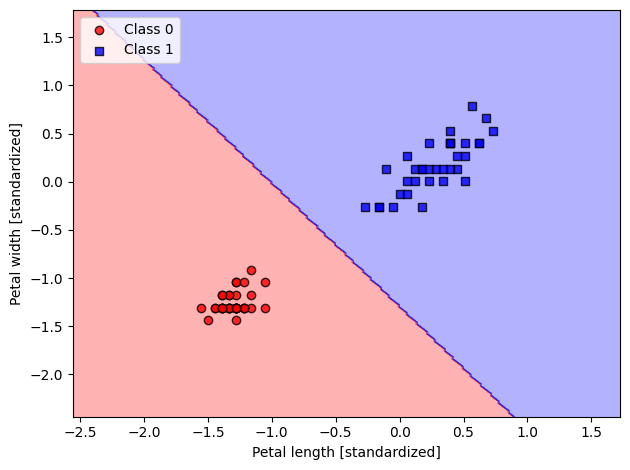

In [10]:
from utils.plot import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Sklearn Implementation: Support multiclass out of the box

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)


LogisticRegression(C=100.0, multi_class='ovr')

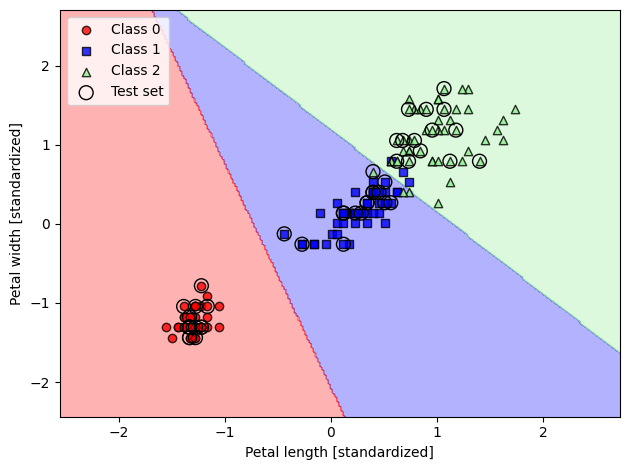

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Show probabilities
lr.predict_proba (X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [16]:
# Show only predicted class
lr.predict_proba (X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])